In [1]:
import scanpy as sc
import harmonypy as hm
import pandas as pd
import anndata as ad
import numpy as np
import scrublet as scr
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import io
from scipy import sparse

import warnings
warnings.filterwarnings('ignore')

random_State = 7

In [2]:
adata = sc.read("/data/BCI-SingleCell/SCC_Atlas/Sam_Nicholls/adata_ker_tum.h5ad")

In [17]:
adata

AnnData object with n_obs × n_vars = 42533 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'Condition', 'Patient_ID', 'Dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'doublet_scores', 'predicted_doublets', 'clusters_r08', 'original_barcodes', 'celltypist_labels_abrv', 'celltypist_labels', 'level_1_cell_type', 'adata_ker_tum_01'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'Condition_colors', 'Patient_ID_colors', 'adata_ker_tum_01', 'adata_ker_tum_01_colors', 'celltypist_labels_colors', 'clusters_r06', 'clusters_r06_colors', 'clusters_r08', 'clusters_r08_colors', 'clusters_r1', 'cl

In [4]:
adata = adata[adata.obs.pct_counts_mt < 10, :].copy()
print("Number of cells after mt filter: {:d}".format(adata.n_obs))

Number of cells after mt filter: 42533


In [5]:
delcols = ['level1_celltype', 'level2_celltype', 'level3_celltype', 'treatment', 
           'clusters_r06','clusters_r1', 'cluster', 'UMAP1', 'UMAP2', ]
for i in delcols:
    del adata.obs[i]
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,batch,Condition,Patient_ID,Dataset,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,pct_counts_ribo,n_genes,doublet_scores,predicted_doublets,clusters_r08,original_barcodes,celltypist_labels_abrv,celltypist_labels,level_1_cell_type,adata_ker_tum_01
AAACCCAGTCATATGC,tetwt4,19143.0,4004.0,GSM6735859,Tumor,P14,Lyko,4004,8.295299,19143.0,...,19.819255,4004,0.045124,False,2,AAACCCAGTCATATGC,Differentiated_KC,Differentiated Keratinocyte,Suprabasal/Differentiating Keratinocytes,0
AAACCCATCGGCTGTG,tetwt4,1149.0,469.0,GSM6735859,Tumor,P14,Lyko,469,6.152733,1149.0,...,15.578764,469,0.037753,False,4,AAACCCATCGGCTGTG,Differentiated_KC,Differentiated Keratinocyte,Suprabasal/Differentiating Keratinocytes,0
AAACGAACAACAGCCC,tetwt4,6563.0,2633.0,GSM6735859,Tumor,P14,Lyko,2633,7.876259,6563.0,...,5.911931,2633,0.047782,False,0,AAACGAACAACAGCCC,Undifferentiated_KC,Undifferentiated Keratinocyte,Basal Keratinocytes,5
AAACGAAGTGGAACAC,tetwt4,49435.0,6669.0,GSM6735859,Tumor,P14,Lyko,6669,8.805375,49435.0,...,15.838980,6669,0.146580,False,10,AAACGAAGTGGAACAC,Differentiated_KC,Differentiated Keratinocyte,Basal Keratinocytes,0
AAAGGATCACGTACTA,tetwt4,10800.0,3240.0,GSM6735859,Tumor,P14,Lyko,3240,8.083637,10800.0,...,19.851852,3240,0.072255,False,0,AAAGGATCACGTACTA,Differentiated_KC,Differentiated Keratinocyte,Basal Keratinocytes,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCCACATTCTT-1,NaN,NaN,NaN,GSM5788502_S12_filtered_feature_bc_matrix,Tumor,P27,Zou,6268,8.743372,41934.0,...,11.468021,6268,0.034406,False,0,TTTCCTCCACATTCTT-1,Differentiated_KC,Differentiated Keratinocyte,Basal Keratinocytes,1
TTTCGATTCATATGGC-1,NaN,NaN,NaN,GSM5788502_S12_filtered_feature_bc_matrix,Tumor,P27,Zou,7325,8.899185,56328.0,...,8.993751,7325,0.051121,False,10,TTTCGATTCATATGGC-1,Undifferentiated_KC,Undifferentiated Keratinocyte,Basal Keratinocytes,4
TTTGACTTCGGCTGGT-1,NaN,NaN,NaN,GSM5788502_S12_filtered_feature_bc_matrix,Tumor,P27,Zou,6237,8.738415,61286.0,...,19.934406,6237,0.057826,False,10,TTTGACTTCGGCTGGT-1,Differentiated_KC,Differentiated Keratinocyte,Basal Keratinocytes,1
TTTGGAGAGCAGATAT-1,NaN,NaN,NaN,GSM5788502_S12_filtered_feature_bc_matrix,Tumor,P27,Zou,4210,8.345455,23162.0,...,31.098351,4210,0.028052,False,0,TTTGGAGAGCAGATAT-1,Undifferentiated_KC,Undifferentiated Keratinocyte,Basal Keratinocytes,1


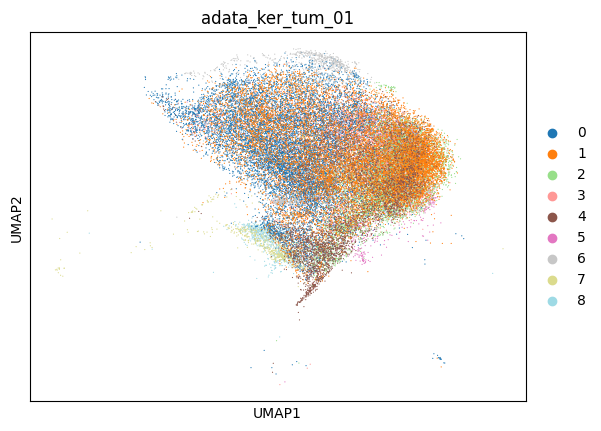

In [6]:
sc.pl.umap(adata, color='adata_ker_tum_01')

### Getting DE ranked genes for cluster 3

In [7]:
sc.tl.rank_genes_groups(adata, groupby='clusters_r08', method='wilcoxon', pts = True, key_added = "Cluster_DE")

In [18]:
#Return only adjusted p-values below the cutoff.
deg = sc.get.rank_genes_groups_df(adata, group = None, key="Cluster_DE")
deg = deg.rename(columns={'group': 'clusters'})
deg['pct_diff'] = deg.pct_nz_group - deg.pct_nz_reference
deg = deg.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('logfoldchanges', ascending=False))
deg = deg.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('pct_diff', ascending=False))
deg = deg[deg['clusters'] == '21']
deg = deg.reset_index()
deg.to_csv('top_genes_table_intum_ker.csv')
deg

,level_0,level_1,level_2,clusters,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,pct_diff
0,3,3,184836,21,KRT19,28.194853,7.996095,6.761996e-175,5.207751e-171,0.856383,0.063406,0.792977
1,3,3,184837,21,KRT7,26.902231,8.523171,2.068125e-159,1.365228e-155,0.813830,0.038428,0.775402
2,3,3,184840,21,AQP5,22.638651,9.441875,1.804798e-113,4.169895e-110,0.680851,0.008255,0.672596
3,3,3,184846,21,PPP1R1B,19.263243,8.303103,1.093126e-82,6.734966e-80,0.582447,0.013046,0.569400
4,3,3,184847,21,S100A1,18.811213,8.153574,6.112334e-79,3.402950e-76,0.571809,0.019641,0.552168
...,...,...,...,...,...,...,...,...,...,...,...,...
46204,3,3,231039,21,KRT6A,-26.743191,-5.704758,1.481816e-157,8.559154e-154,0.140957,0.867970,-0.727012
46205,3,3,231040,21,HSPB1,-28.507339,-5.099731,9.500552e-179,8.780220e-175,0.226064,0.956306,-0.730242
46206,3,3,231038,21,PLP2,-25.472507,-4.622966,3.976539e-143,2.041688e-139,0.095745,0.826435,-0.730690
46207,3,3,231044,21,KRT5,-30.009195,-6.179954,7.444825e-198,3.440179e-193,0.196809,0.940034,-0.743225


### GSEAPY pathway analysis

In [9]:
import gseapy as gp
from gseapy.plot import barplot, dotplot

#Reading in my ranked genes
degs = pd.read_csv('top_genes_table_intum_ker.csv', index_col = 0)

# Compute GSEA ranking score
degs['ranking_score'] = degs['logfoldchanges'] * -np.log10(degs['pvals'])
finite_vals = degs['ranking_score'].replace([np.inf, -np.inf], np.nan)
max_val = np.nanmax(np.abs(finite_vals))

# THis code changes some infinite values to finite ones, each with a different score to allow them to work in gseapy
degs.loc[np.isinf(degs['ranking_score']), 'ranking_score'] = [
    np.sign(degs.at[idx, 'ranking_score']) * (max_val + (i + 1)*1e-6)
    for i, idx in enumerate(degs.index[np.isinf(degs['ranking_score'])])
]

degs.drop(columns=['level_0', 'level_1', 'level_2'], inplace=True)
degs.index = degs['names']
degs

,clusters,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,pct_diff,ranking_score
names,,,,,,,,,,
KRT19,21,KRT19,28.194853,7.996095,6.761996e-175,5.207751e-171,0.856383,0.063406,0.792977,1392.679215
KRT7,21,KRT7,26.902231,8.523171,2.068125e-159,1.365228e-155,0.813830,0.038428,0.775402,1352.494474
AQP5,21,AQP5,22.638650,9.441875,1.804798e-113,4.169895e-110,0.680851,0.008255,0.672596,1064.510709
PPP1R1B,21,PPP1R1B,19.263243,8.303103,1.093126e-82,6.734966e-80,0.582447,0.013046,0.569400,680.533364
S100A1,21,S100A1,18.811213,8.153574,6.112334e-79,3.402950e-76,0.571809,0.019641,0.552168,637.721948
...,...,...,...,...,...,...,...,...,...,...
KRT6A,21,KRT6A,-26.743190,-5.704758,1.481816e-157,8.559154e-154,0.140957,0.867970,-0.727012,-894.672619
HSPB1,21,HSPB1,-28.507340,-5.099731,9.500552e-179,8.780220e-175,0.226064,0.956306,-0.730242,-907.865664
PLP2,21,PLP2,-25.472507,-4.622966,3.976539e-143,2.041688e-139,0.095745,0.826435,-0.730690,-658.312646


In [10]:
#degs.to_csv('top_genes_table_intum_ker.csv')

In [24]:
#Ranking genes based on the score, the ranking score calculation produces infinites which wont work
ranked_gene_list = degs['ranking_score']
ranked_gene_list = ranked_gene_list.sort_values(ascending=False)

print(ranked_gene_list)
print(len(ranked_gene_list))

names
KRT19      1392.679215
KRT7       1352.494474
AQP5       1064.510709
KRT18       685.986823
PPP1R1B     680.533364
              ...     
HSPB1      -907.865664
SFN        -966.413070
KRT14      -983.838638
KRT5      -1218.242792
S100A2    -1267.539602
Name: ranking_score, Length: 46209, dtype: float64
46209


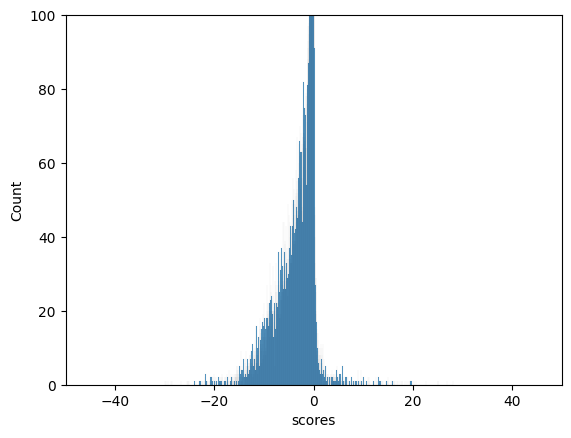

In [12]:
#Testing whether the scores have a gaussian distribution 
sns.histplot(degs['scores'])
plt.ylim(0, 100)
plt.xlim(-50, 50)
plt.show()

In [25]:
gene_sets = ["GO_Biological_Process_2025",
             "KEGG_2021_Human",
             "Reactome_Pathways_2024",
             "MSigDB_Hallmark_2020",
            ]
from gseapy import dotplot

#Functions do generate dotplots of top pathways using all of the gene sets
def gsea_runner(gene_set, ranked_gene_list=ranked_gene_list):
    # 2. Run GSEA using prerank (equivalent to gseGO)
    gsea_res = gp.prerank(
        rnk=ranked_gene_list,  # Must be a pandas Series or 2-col DataFrame
        gene_sets="GO_Biological_Process_2025",  # or 'GO_Biological_Process_2021', etc.       
        permutation_num=10000,  # Can increase for better stats
        outdir="figures", # Save results
        seed=117,  # For reproducibility
        verbose=True,
        #min_size=5,
        #max_size=1000
    )

    gsea_res.res2d.to_csv(f"figures/GSEA_{gene_set}.csv")

    # to save your figure, make sure that ``ofname`` is not None
    ax = dotplot(gsea_res.res2d,
                 column="FDR q-val",
                 title=f"{gene_set}",
                 cmap=plt.cm.viridis,
                 size=6, # adjust dot size
                 figsize=(4,5), cutoff=0.2, show_ring=False,
                 ofname=f"figures/GSEA_{gene_set}.png")

In [26]:
for gene in gene_sets:
    gsea_runner(gene)

2025-07-22 21:40:50,080 [WARNING] Duplicated values found in preranked stats: 26.14% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-22 21:40:50,080 [INFO] Parsing data files for GSEA.............................
2025-07-22 21:40:50,142 [INFO] Enrichr library gene sets already downloaded in: /data/home/ha20577/.cache/gseapy, use local file
2025-07-22 21:40:50,249 [INFO] 2724 gene_sets have been filtered out when max_size=500 and min_size=15
2025-07-22 21:40:50,251 [INFO] 2619 gene_sets used for further statistical testing.....
2025-07-22 21:40:50,251 [INFO] Start to run GSEA...Might take a while..................
2025-07-22 21:57:23,329 [INFO] Congratulations. GSEApy runs successfully................



ValueError: Warning: No enrich terms when cutoff = 0.2

In [21]:
foo = pd.read_csv("figures/GSEA_GO_Biological_Process_2025.csv")
foo

,Unnamed: 0,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,0,prerank,Epithelium Development (GO:0060429),0.865616,1.315709,0.007503,1.000000,0.9256,7/25,5.99%,KRT19;CLDN3;AKR1C1;LGALS3;SOX10;CNN3;KRT15
1,1,prerank,Monocarboxylic Acid Metabolic Process (GO:0032...,0.832638,1.264022,0.039023,1.000000,0.9983,2/24,2.54%,DBI;AKR1C1
2,2,prerank,Cilium Organization (GO:0044782),0.831722,1.261682,0.057031,1.000000,0.9986,3/20,5.44%,ROPN1B;ROPN1;FNBP1L
3,3,prerank,Transcription by RNA Polymerase II (GO:0006366),0.831903,1.259091,0.044140,1.000000,0.9987,5/23,8.63%,TSC22D1;ELOB;CEBPD;ETV1;PPARGC1A
4,4,prerank,Inorganic Cation Transmembrane Transport (GO:0...,0.825959,1.253543,0.035207,1.000000,0.9992,13/27,12.27%,LRRC26;SLC12A2;KCNN4;SLC6A14;ATP6V0A4;ATP1B1;A...
...,...,...,...,...,...,...,...,...,...,...,...
232,232,prerank,Protein Modification by Small Protein Conjugat...,0.436900,0.664417,0.973000,0.976614,1.0000,4/30,23.89%,RACK1;NEDD4L;LMO7;FBXO32
233,233,prerank,Intracellular Protein Transport (GO:0006886),0.416822,0.633651,0.988200,0.982421,1.0000,6/36,24.29%,ARFGAP3;STAT3;RAB17;MYO6;BCL3;VPS37B
234,234,prerank,Axon Guidance (GO:0007411),0.401300,0.608748,0.957187,0.984713,1.0000,7/15,45.49%,SEMA3G;NFIB;VEGFA;EPHA7;PTPRJ;NTN4;EPHB3
235,235,prerank,Axonogenesis (GO:0007409),0.392340,0.593762,0.973550,0.983836,1.0000,10/20,50.02%,S100A6;SEMA3G;ANK3;EPHA7;AUTS2;PTPRJ;NTN4;EPHB...


In [ ]:
#Ranking genes based on the score, the ranking score calculation produces infinites which wont work
# Remove or collapse duplicates, keeping only the highest score per gene
gsea_res = gp.prerank(
    rnk=ranked_gene_list,  # Must be a pandas Series or 2-col DataFrame
    gene_sets="GO_Biological_Process_2025",  # or 'GO_Biological_Process_2021', etc.
    processes=8,          # Number of CPU cores
    permutation_num=10000,  # Can increase for better stats
    outdir="figures", # Save results
    seed=117,  # For reproducibility
    verbose=True,
    #min_size=5,
    #max_size=1000
)

gsea_res.res2d

2025-07-22 20:10:50,425 [WARNING] Duplicated values found in preranked stats: 63.55% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-07-22 20:10:50,426 [INFO] Parsing data files for GSEA.............................
2025-07-22 20:10:50,458 [INFO] Enrichr library gene sets already downloaded in: /data/home/ha20577/.cache/gseapy, use local file
2025-07-22 20:10:50,563 [INFO] 2724 gene_sets have been filtered out when max_size=500 and min_size=15
2025-07-22 20:10:50,565 [INFO] 2619 gene_sets used for further statistical testing.....
2025-07-22 20:10:50,566 [INFO] Start to run GSEA...Might take a while..................


In [ ]:
#Ranking genes based on the ranking score
# Remove or collapse duplicates, keeping only the highest score per gene
ranked_gene_l = degs['ranking_score']
ranked_gene_l = ranked_gene_list.sort_values(ascending=False)

gsea_res = gp.prerank(
    rnk=ranked_gene_l,  # Must be a pandas Series or 2-col DataFrame
    gene_sets="GO_Biological_Process_2025",  # or 'GO_Biological_Process_2021', etc.
    processes=8,          # Number of CPU cores
    permutation_num=10000,  # Can increase for better stats
    outdir="figures", # Save results
    seed=117,  # For reproducibility
    verbose=True,
    #min_size=5,
    #max_size=1000
)

gsea_res.res2d

In [ ]:
gsea_res.res2d[gsea_res.res2d['Term'] == 'Epithelium Development (GO:0060429)']